# Crime Analytics Assignment

This analysis is mostly based on Seattle data for Summer 2014.

We first try to identify time and spatial patterns, if any,
by visualizing differents aspects of the data in Seattle.

Finally, we draw a quick and limlited comparison between Seattle and San Francisco
by comparing two selected categories of incidents.

# Seattle Crime Data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
crimedata_sf = "sanfrancisco_incidents_summer_2014.csv"
crimedata_seattle = "seattle_incidents_summer_2014.csv"
df_sf = pd.read_csv(crimedata_sf)
df_seattle = pd.read_csv(crimedata_seattle, low_memory=False)

## Crime incidents types

How many offense types and categories do we have in Seattle records ?

In [3]:
len(df_seattle['Offense Type'].unique())

147

In [4]:
len(df_seattle['Summarized Offense Description'].unique())

48

What is the relative frequency of each offense category ?

In [5]:
offense_freq = df_seattle[['RMS CDW ID', 'Summarized Offense Description']].groupby(['Summarized Offense Description']).count()
offense_freq.rename(columns={"RMS CDW ID": "count"}, inplace=True)
offense_freq.sort_values('count', inplace=True, ascending=True)


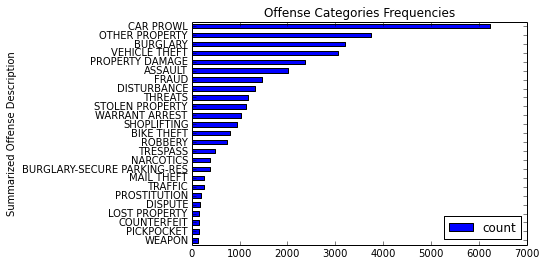

In [6]:
offense_freq[-25:].plot(kind="barh", title="Offense Categories Frequencies")

We show only the 25 most frequent categories.

The 23 other categories account for 2 % only of the incidents :

In [7]:
offense_freq[0:23].sum() / offense_freq.sum()

count    0.023369
dtype: float64

## Time patterns

First, we prepare time columns to convert data to datetime and derive some useful information such as week day and day hour of the incidents :

In [8]:
for col in ['Date Reported', 'Occurred Date or Date Range Start', 'Occurred Date Range End']:
    df_seattle[col] = pd.to_datetime(df_seattle[col])
df_seattle['Week Day'] = df_seattle['Occurred Date or Date Range Start'].map(lambda x: x.isoweekday())
df_seattle['Day Hour'] = df_seattle['Occurred Date or Date Range Start'].map(lambda x: x.hour)
df_seattle['Date'] = df_seattle['Occurred Date or Date Range Start'].map(lambda x: x.date())

How do incidents spread accross the day ?

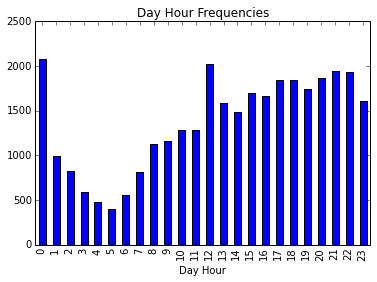

In [9]:
df_seattle.groupby('Day Hour')['Day Hour'].count().plot(kind='bar', title="Day Hour Frequencies")

Incidents tend to occur more often in the afternoon, and overall crime activity is lesser at night. 

Do some categories exhibit specific day pattern ?

We visually check for some category pairs and found.
For example, 'NARCOTICS' and 'PROSTITUTION' categories do not occur at the same time in day :

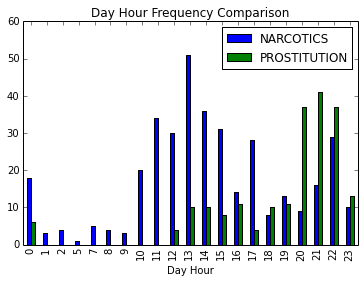

In [21]:
d1 = df_seattle[df_seattle['Summarized Offense Description'] == 'NARCOTICS'].groupby('Day Hour')['Day Hour'].count()
d2 = df_seattle[df_seattle['Summarized Offense Description'] == 'PROSTITUTION'].groupby('Day Hour')['Day Hour'].count()
# d3 = df_seattle[df_seattle['Summarized Offense Description'] == 'BURGLARY'].groupby('Day Hour')['Day Hour'].count()
df = pd.DataFrame({ "NARCOTICS": d1, "PROSTITUTION": d2}).fillna(0)
df.plot(kind="bar", title="Day Hour Frequency Comparison")

What about differences during the week ? Are there 'busier' week days ?

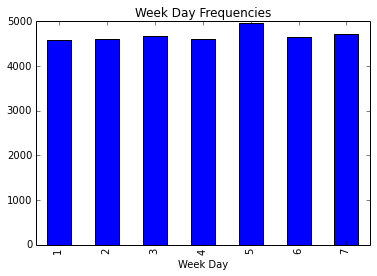

In [11]:
df_seattle.groupby('Week Day')['Week Day'].count().plot(kind='bar', title="Week Day Frequencies")

We observe there are a little more incidents on Fridays.

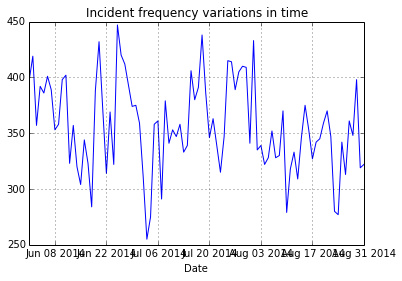

In [12]:
p = df_seattle.groupby('Date')['Date'].count().plot(kind="line", title="Incident frequency variations in time")
p.grid(True)

There is no clear pattern, except Seattle seemed to be quieter in August 2014 compared to June and July. Do people living in Seattle leave on holiday mostly in August ?

It would be interesting to check for the peak days but also the days with lower incident rates.

## Spatial patterns

Next, we would like to know it there are some spatial patterns that explain
that location of crime indicents.

We could plot a bar chart by Districts/Sectors, but we want to have a more precise view of the location of the incidents, and we plot a general hexbin map of the count of reported incidents :

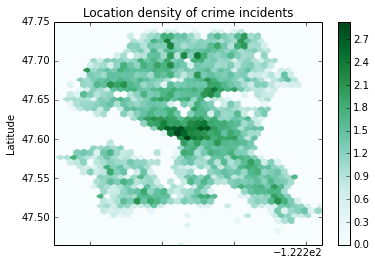

In [14]:
# Filter out invalid locations
df_seattle = df_seattle[df_seattle['Longitude'] < 0]
df_seattle.plot(kind='hexbin', x='Longitude', y='Latitude', bins='log', gridsize=40, title='Location density of crime incidents')

Though this is not a true cartographic map, we can identify the shape of the town.
Moreover, we observe the density of incidents is the highest in the town center,
and we may identify some "hot spots".

What about specific incident categories locations ?
Let's display the locations of burglary events :

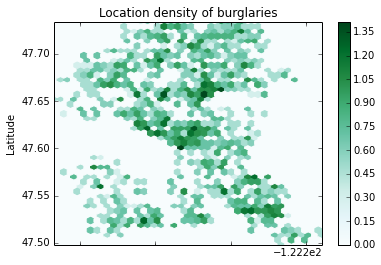

In [17]:
df_seattle[df_seattle['Summarized Offense Description'] == 'BURGLARY'].plot(kind='hexbin', x='Longitude', y='Latitude', bins='log', gridsize=40, title='Location density of burglaries')

Burglaries tend to be quite disseminated accross the town than the overall spatial pattern.

Other categories are more specific to some location :

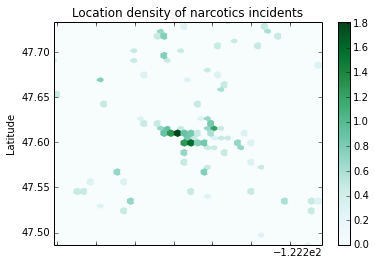

In [18]:
df_seattle[df_seattle['Summarized Offense Description'] == 'NARCOTICS'].plot(kind='hexbin', x='Longitude', y='Latitude', bins='log', gridsize=40, title='Location density of narcotics incidents')

As a conclusion, we may retain the following :

- patterns vary greatly between incident categories
- both location and time in the day exhibit specific pattern for specific categories of incidents.

# A (limited) comparision between Seattle and San Francisco

For our quick and limited comparison between Seattle and San Francisco,
we pick two categories of incidents that seem to be recorded
in a rather unambiguous way in both cities : narcotics and prostitution.

In [25]:
df_sf['Day Hour'] = df_sf['Time'].map(lambda x: pd.to_datetime(x).hour)
d1sf = df_sf[df_sf['Category'] == 'DRUG/NARCOTIC'].groupby('Day Hour')['Day Hour'].count()
d2sf = df_sf[df_sf['Category'] == 'PROSTITUTION'].groupby('Day Hour')['Day Hour'].count()

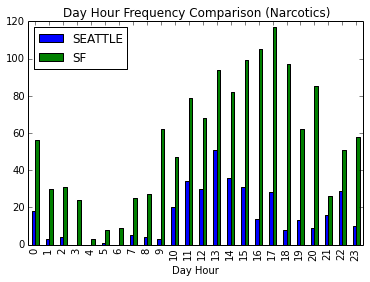

In [23]:
df = pd.DataFrame({ "SEATTLE": d1, "SF": d1sf}).fillna(0)
df.plot(kind="bar", title="Day Hour Frequency Comparison (Narcotics)")

There seems to be more narcotics incidents reported in San Francisco than in Seattle
(though we did not scale the figures according to the total number of incidents
or the population of each town).

We do not observe neither the same time pattern for the narcotics incidents :
in Seattle, narcotics incidents occur at midday, with strong variation accross the day,
whereas in San Francisco, the day time pattern is close to the overall time pattern
of all incidents.

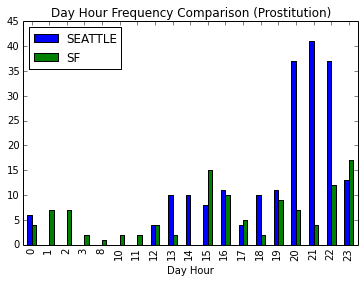

In [24]:
df = pd.DataFrame({ "SEATTLE": d2, "SF": d2sf}).fillna(0)
df.plot(kind="bar", title="Day Hour Frequency Comparison (Prostitution)")

Prostitution happen at different time in the day in Seattle and in San Francicso.
There is prostitution at night in San Francisco that is not observed in Seattle,
whereas there are relatively much more prostitution reports in the evening in Seattle.